# 흡연 여부 예측 해커톤

## Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/basic_smoking_class/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/basic_smoking_class/test.csv')
submit = pd.read_csv('https://raw.githubusercontent.com/han942/vscode/refs/heads/main/datafile/dacon/basic_smoking_class/sample_submission.csv')

In [2]:
train.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0


In [3]:
test.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율
0,TEST_0000,40,165,55,20.20,0.90,1,98,47,75,0.5,229,59,155,13.7,1,1.73
1,TEST_0001,65,145,50,23.78,0.50,0,99,59,98,0.6,200,65,115,12.2,1,1.00
2,TEST_0002,40,160,75,29.30,1.00,0,105,34,232,0.6,170,50,73,15.1,1,1.33
3,TEST_0003,30,180,90,27.78,1.35,0,78,45,218,0.9,197,55,98,15.2,1,0.89
4,TEST_0004,50,155,55,22.89,0.75,0,116,67,139,1.0,230,66,136,15.0,1,0.85


In [4]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes,columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) *100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    
    return summ
summary(train)  

data shape: (7000, 18)


,data type,#missing,%missing,#unique,min,max
ID,object,0,0.0,7000,NaN,NaN
나이,int64,0,0.0,14,20.0,85.0
키(cm),int64,0,0.0,12,135.0,190.0
몸무게(kg),int64,0,0.0,21,30.0,130.0
BMI,float64,0,0.0,117,14.27,42.45
시력,float64,0,0.0,49,0.1,9.9
충치,int64,0,0.0,2,0.0,1.0
공복 혈당,int64,0,0.0,172,57.0,386.0
혈압,int64,0,0.0,70,14.0,91.0
중성 지방,int64,0,0.0,371,21.0,999.0


In [5]:
train = train.drop('ID',axis=1)
test = test.drop('ID',axis=1)

## EDA
 - no missing values

### 0. label

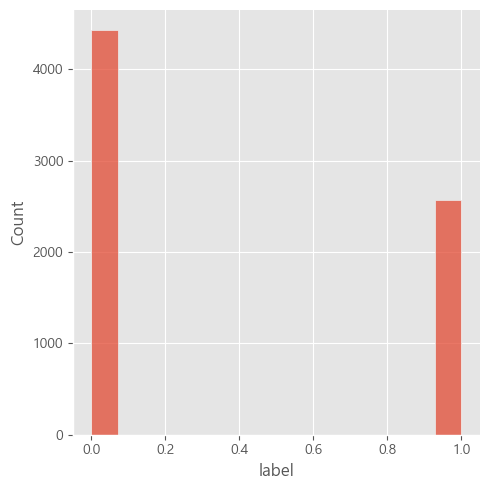

In [6]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'

sns.displot(train['label'])

### 1. 나이

<Axes: xlabel='나이', ylabel='Count'>

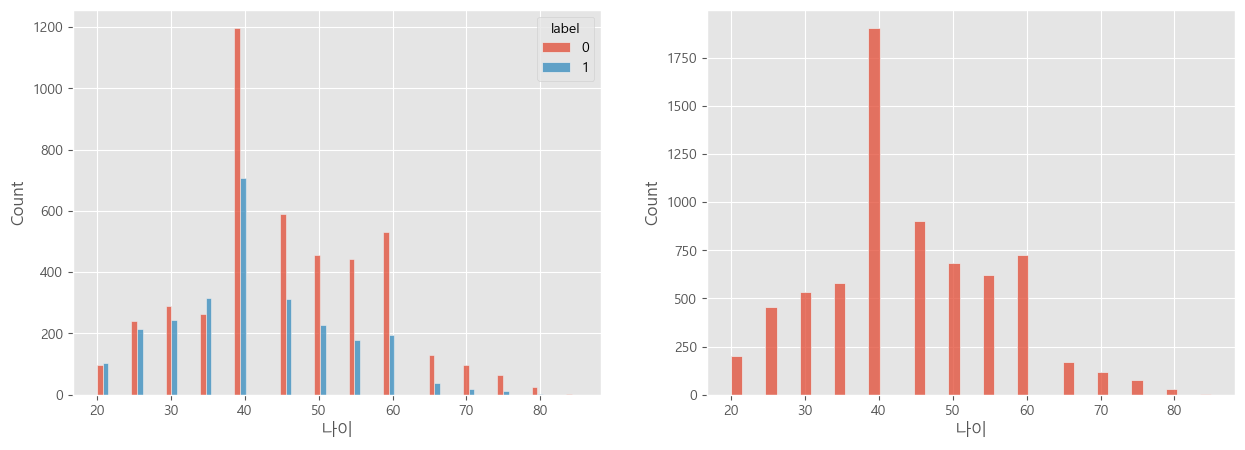

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(x=train['나이'], hue=train['label'], multiple='dodge', ax=axes[0])
sns.histplot(train['나이'], ax=axes[1])

### 2. 키(cm) , 몸무게(kg), BMI
- 키,몸무게를 5단위로 끊어놓음 -> 약간 범주형 변수처럼 해놓음
    - 하지만 분명히 숫자간 대소가 존재함.
- BMI는 키,몸무게로 계산이 가능함. => 삭제 or 범주형 변수로 바꿔도 될듯?

<Axes: xlabel='키(cm)', ylabel='Count'>

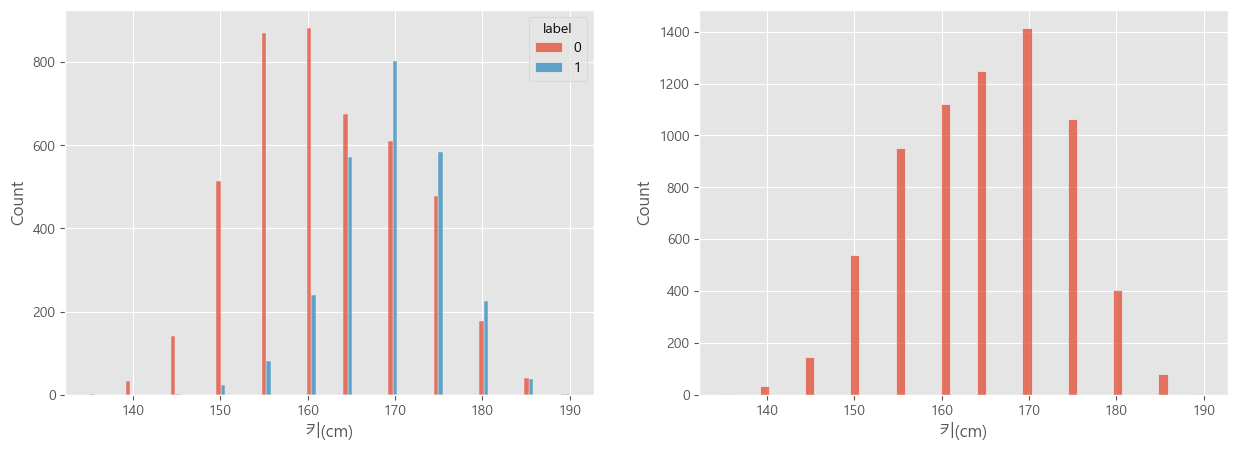

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(x=train['키(cm)'], hue=train['label'], multiple='dodge', ax=axes[0])
sns.histplot(train['키(cm)'], ax=axes[1])

<Axes: xlabel='BMI', ylabel='Count'>

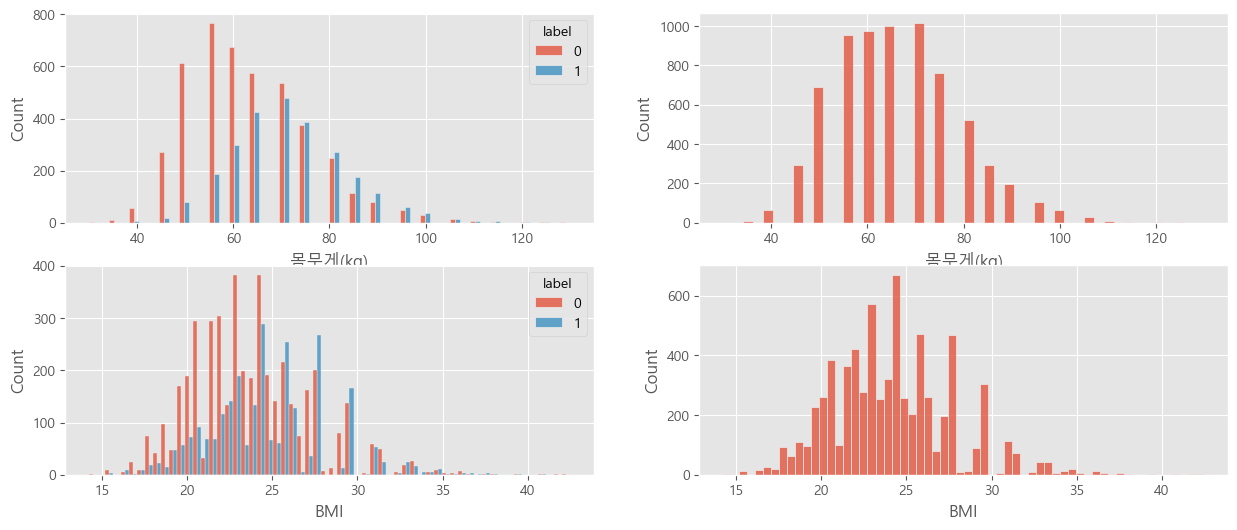

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

sns.histplot(x=train['몸무게(kg)'], hue=train['label'], multiple='dodge', ax=axes[0,0])
sns.histplot(train['몸무게(kg)'], ax=axes[0,1])
sns.histplot(x=train['BMI'], hue=train['label'], multiple='dodge', ax=axes[1,0])
sns.histplot(train['BMI'], ax=axes[1,1])

### 3. 시력
- 시력에 이상치 발견: 4.0이상의 데이터 삭제하면 될듯
- 소수점 자리까지 표현된 데이터 발견

<Axes: xlabel='시력', ylabel='Count'>

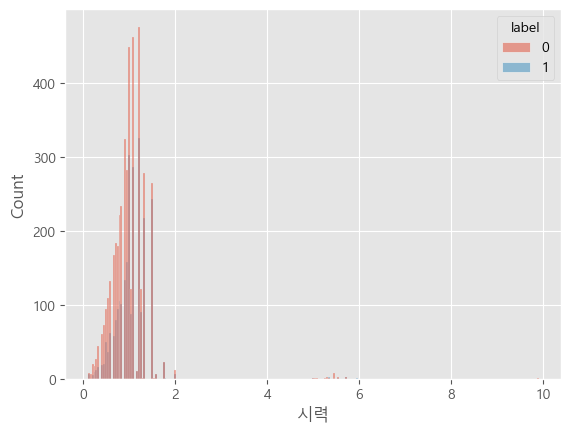

In [10]:
sns.histplot(x=train['시력'],hue=train['label'])

In [11]:
train.loc[train['시력']>2.0].sort_values('시력',ascending=False)

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
6003,45,170,75,25.95,9.90,1,96,46,370,1.1,208,45,89,14.9,1,0.86,0
3909,45,160,55,21.48,5.95,0,88,60,137,1.2,202,49,126,13.6,1,1.00,1
355,35,180,75,23.15,5.70,1,97,36,92,0.8,209,62,129,14.6,1,0.55,1
5675,60,165,45,16.53,5.70,0,122,44,54,0.7,179,60,108,14.4,1,1.53,1
5218,35,165,75,27.55,5.70,0,119,45,149,0.8,191,50,111,15.7,1,1.00,1
2911,40,165,90,33.06,5.70,0,94,44,83,0.8,183,55,111,14.3,1,1.00,0
3886,75,160,65,25.39,5.70,0,98,54,86,1.2,188,46,125,13.8,1,1.32,0
3856,45,175,85,27.76,5.70,0,91,53,80,0.5,108,45,47,14.5,1,0.79,0
1896,55,165,60,22.04,5.55,0,97,40,71,0.9,211,66,131,16.5,1,1.25,0
4627,65,165,70,25.71,5.55,0,108,40,205,0.8,160,47,72,15.2,3,0.90,0


### 4. 충치
- 충치와 나이가 상관관계가 있을것으로 예상.

<Axes: xlabel='충치', ylabel='Count'>

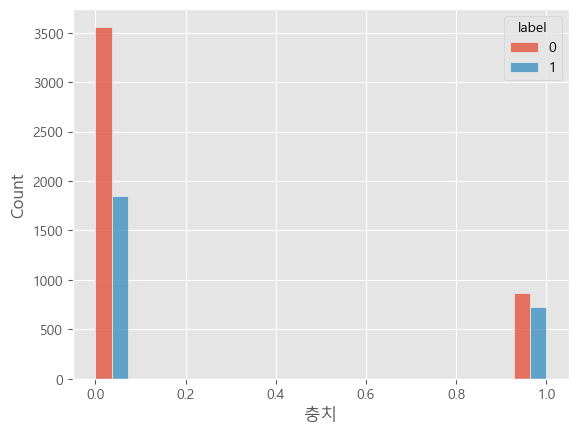

In [12]:
sns.histplot(x=train['충치'],hue=train['label'],multiple='dodge')

Text(0.5, 1.0, '충치-나이 비율')

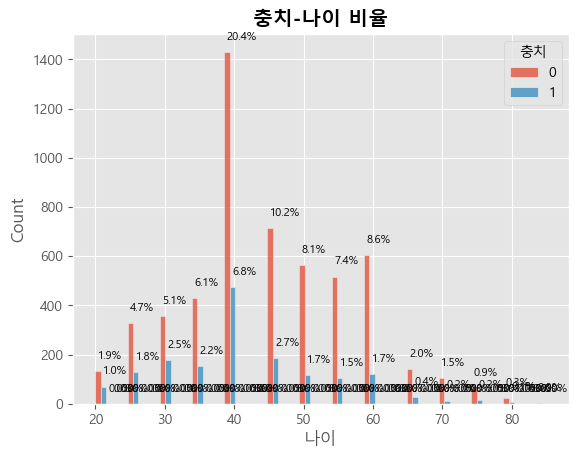

In [13]:
ax = sns.histplot(x='나이', hue='충치', data=train, multiple='dodge')

# Calculate percentages and annotate each bar
total = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05  # Adjust horizontal position
    y = p.get_height() + 50     # Adjust vertical position
    ax.text(x, y, percentage, size=8)
ax.set_title('충치-나이 비율',weight='bold')

### 5. 공복혈당 & 혈압
- 공복혈당에 이상치가 몇개 존재함, 이들은 대부분 1(흡연자) => 삭제 안하는 방향으로

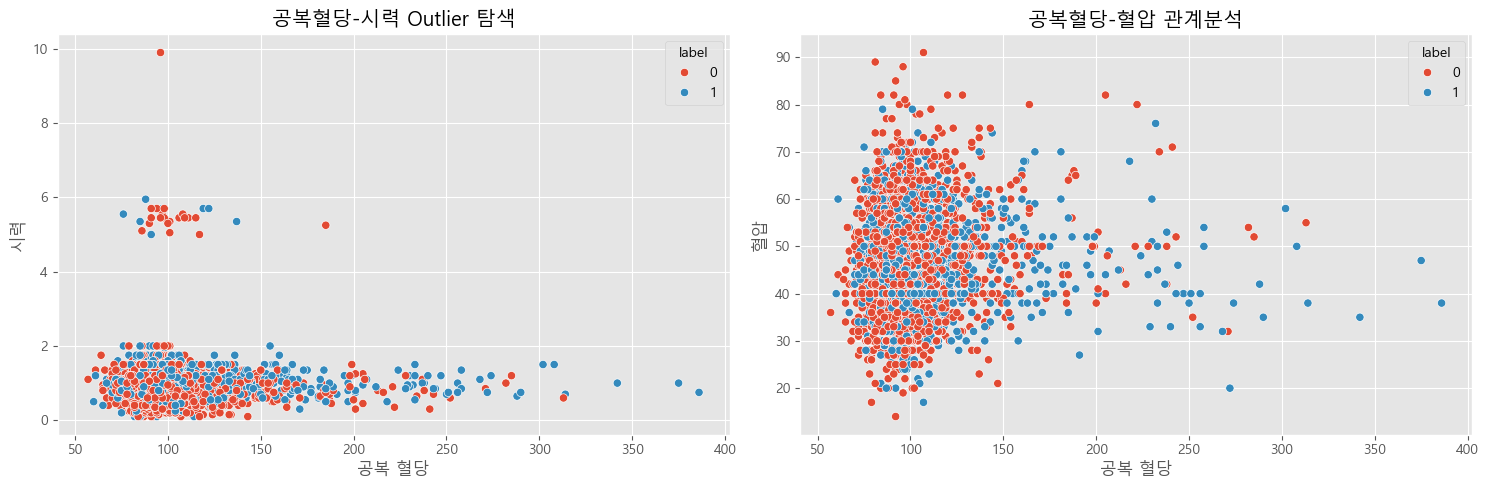

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x='공복 혈당',y='시력',data=train,hue='label', ax=axes[0])
axes[0].set_title('공복혈당-시력 Outlier 탐색')

sns.scatterplot(x='공복 혈당',y='혈압',data=train,hue='label', ax=axes[1])
axes[1].set_title('공복혈당-혈압 관계분석')

plt.tight_layout()
plt.show()

### 6. 중성지방
- 중성지방은 심혈관 질환과 연결됨 ==> **혈압,콜레스테롤,고밀도 지단백,저밀도 지단백**
- 중성지방 최댓값이 999 -> 이상치로 간주해서 삭제 or 평균값으로 대체

In [15]:
train.loc[train['중성 지방']>500]

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
5839,45,160,70,27.34,1.0,0,108,51,999,1.0,320,41,50,15.6,1,1.05,1


(0.0, 500.0)

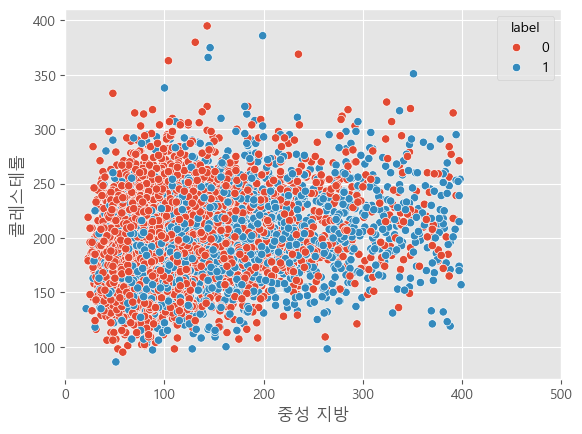

In [16]:
sns.scatterplot(x='중성 지방',y='콜레스테롤',data=train,hue='label')
plt.xlim(0,500)

### 7. 혈청 크레아티닌,요단백 (신장요소)
- 일반적으로 반비례의 관계를 가짐.
- ~~혈청 크레아티닌의 이상치가 몇개 있음. => 그냥 방치~~

In [17]:
train.loc[train['혈청 크레아티닌']>4]

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
2335,65,160,55,21.48,0.50,0,92,41,82,7.4,128,49,62,12.7,5,1.50,0
3498,70,165,60,22.04,0.80,0,107,50,151,5.9,109,36,42,11.9,1,1.20,1
3965,55,170,65,22.49,0.95,0,102,40,55,10.0,153,60,82,13.7,1,0.72,0


Text(0.5, 1.0, '혈청크레아티닌-요단백 outlier,상관관계분석')

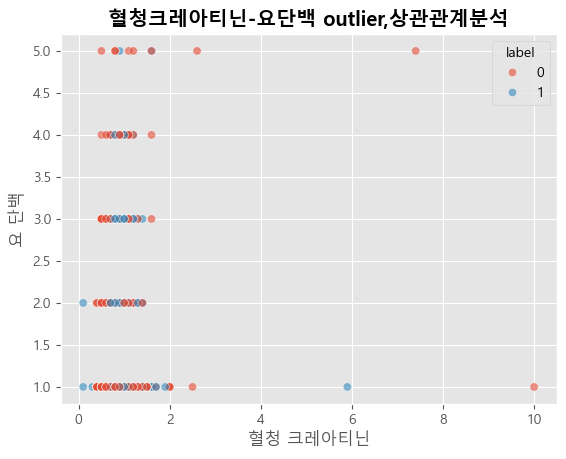

In [18]:
sns.scatterplot(x=train['혈청 크레아티닌'],y=train['요 단백'],alpha=0.6,hue=train['label'])
plt.title('혈청크레아티닌-요단백 outlier,상관관계분석',weight='bold')

(0.0, 3.0)

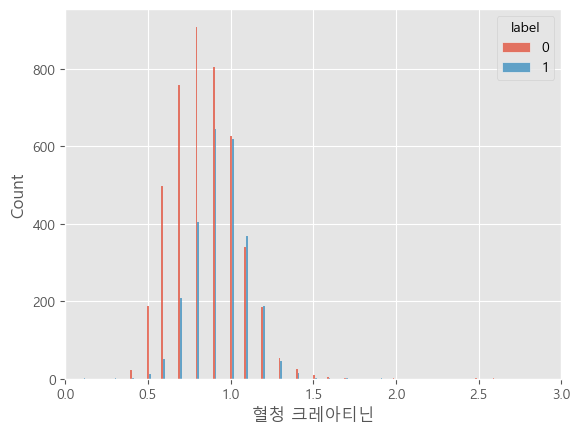

In [19]:
sns.histplot(x=train['혈청 크레아티닌'],hue=train['label'],multiple='dodge')
plt.xlim(0,3)

### 8. 헤모글로빈

<Axes: xlabel='헤모글로빈', ylabel='Count'>

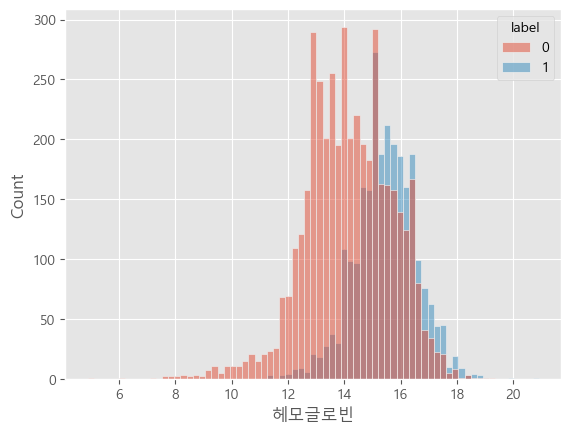

In [20]:
sns.histplot(x=train['헤모글로빈'],hue=train['label'])

### 9. 간효소율

<Axes: xlabel='간 효소율', ylabel='Count'>

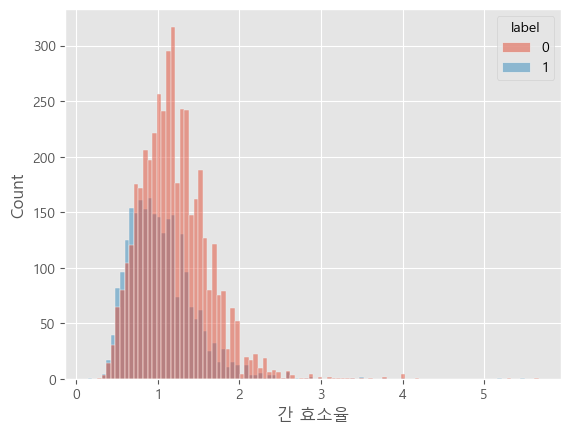

In [21]:
sns.histplot(x=train['간 효소율'],hue=train['label'])

### 10. LDL,HDL (고/저밀도 지단백)
- LDL이 1000이 넘어가는 수치가 있음 -> outlier

Text(0.5, 1.0, 'LDL-Target')

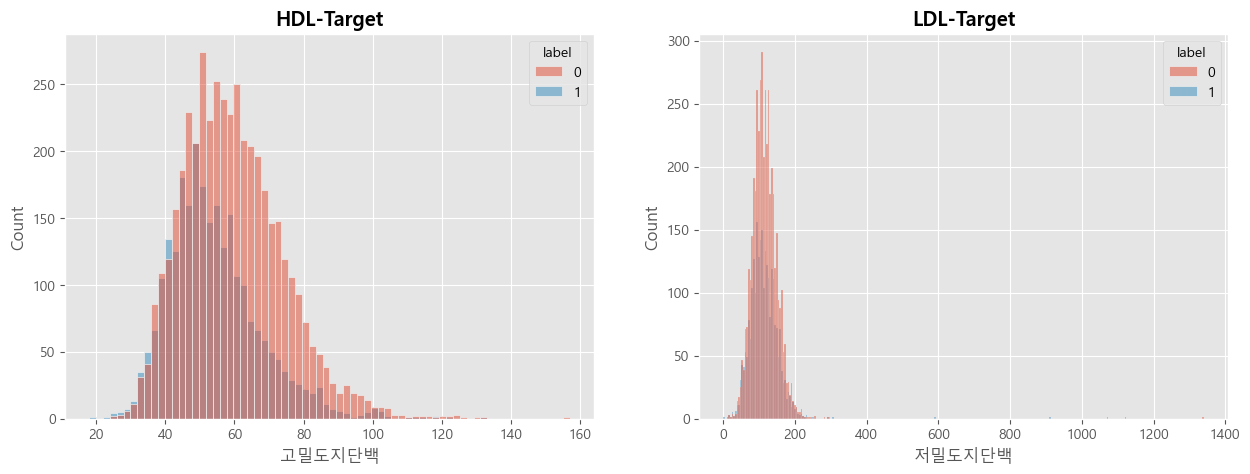

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(x=train['고밀도지단백'],hue=train['label'], ax=axes[0])
sns.histplot(x=train['저밀도지단백'],hue=train['label'], ax=axes[1])
axes[0].set_title('HDL-Target',weight='bold')
axes[1].set_title('LDL-Target',weight='bold')

## Feature Engineering
- Ideas
    - Outliers
        - 시력>4.0 (replace with Nan)
        - 중성지방 = 999 (replace with mean or drop)
- Adapted

In [37]:
df_tr = train.copy()
df_te = test.copy()

In [38]:
df_tr['시력'].loc[df_tr['시력']>4] = np.nan
print('변경 후 시력 Max',df_tr['시력'].max())

df_tr['중성 지방'] = df_tr['중성 지방'].replace(df_tr['시력'].max(),df_tr['시력'].mean())

변경 후 시력 Max 2.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9524\2214614314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tr['시력'].loc[df_tr['시력']>4] = np.nan


In [39]:
train.shape,df_tr.shape

((7000, 17), (7000, 17))

c:\Anaconda3\envs\vscode_jupyter\Lib\site-packages\seaborn\utils.py:84: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Anaconda3\envs\vscode_jupyter\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Anaconda3\envs\vscode_jupyter\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


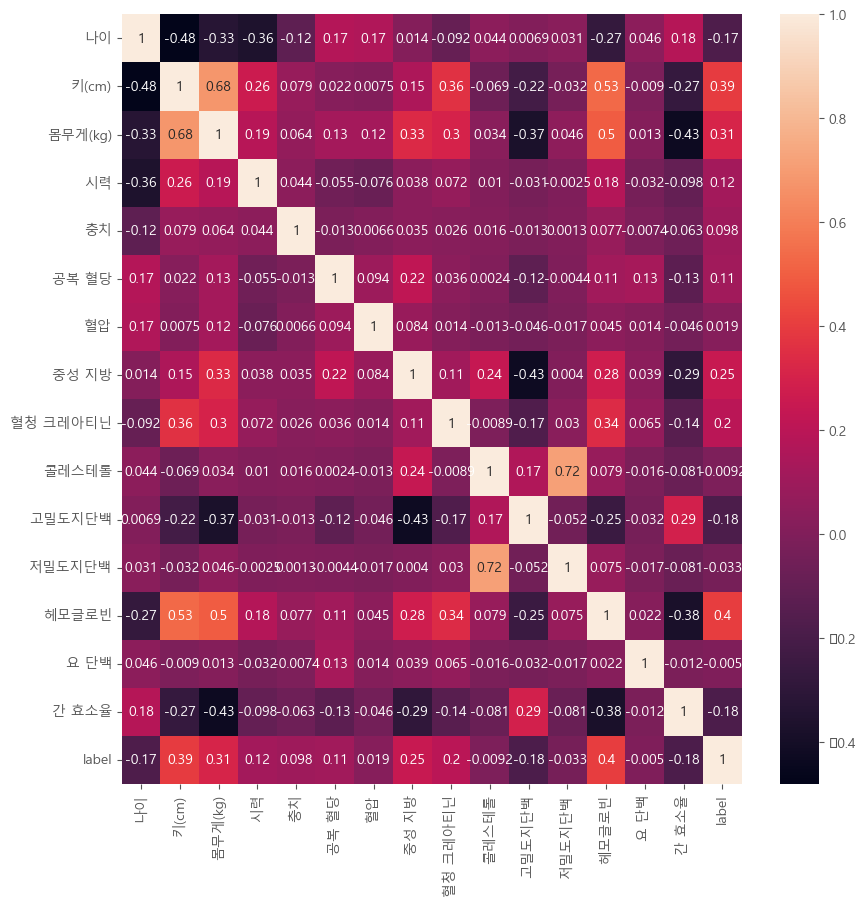

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(df_tr.corr(),annot=True)

<Axes: ylabel='공복 혈당'>

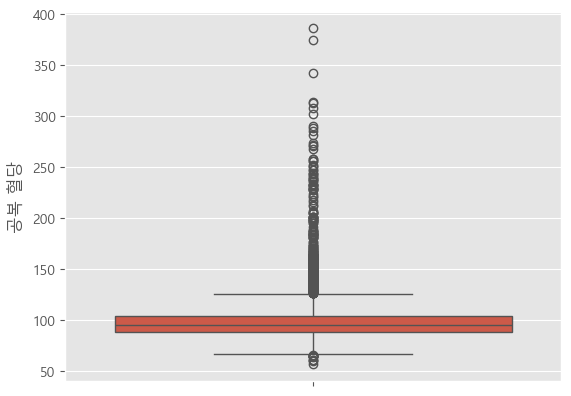

In [144]:
sns.boxplot(train['공복 혈당'])

## Model

In [40]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from optuna import Trial,visualization
from optuna.samplers import TPESampler
from sklearn.metrics import accuracy_score
import optuna 

from sklearn.model_selection import StratifiedKFold

### XGBoost

#### Baseline
- 0.716 (데이터 그대로)
- 이상치 변환 및 BMI 삭제 : 0.717
- 이상치 변환 : 0.72

In [41]:
X,y = df_tr.drop('label',axis=1),train['label']
X_test = df_te

In [42]:
xgb_val_preds = np.zeros(X.shape[0])
xgb_test_preds = np.zeros(X_test.shape[0])
xgb_val_pred_proba = np.zeros(X.shape[0])

folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=2025)
acc_xgb = []
evals_result_all = []

for idx,(train_idx,val_idx) in enumerate(folds.split(X,y)):
    print(f'Fold {idx+1} / Fold {folds.n_splits}')
    X_train,y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_val,y_val = X.iloc[val_idx],y.iloc[val_idx]

    xgb = XGBClassifier(random_state=2025)
    xgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)],verbose=False)
    xgb_val_preds[val_idx] = xgb.predict(X_val)
    xgb_val_pred_proba[val_idx] = xgb.predict_proba(X_val)[:,1]
    
    print(f'Train acc {accuracy_score(y_train,xgb.predict(X_train))}')
    print(f'Valid acc: {accuracy_score(y_val,xgb.predict(X_val))}')
    print('-'*30)

    xgb_test_preds += xgb.predict(X_test)/folds.n_splits
    acc_xgb.append(accuracy_score(y_val,xgb_val_preds[val_idx]))

    evals_result_all.append(xgb.evals_result_)

print(f'Accuracy: {np.array(acc_xgb).mean()}')

Fold 1 / Fold 5
Train acc 0.9805357142857143
Valid acc: 0.7428571428571429
------------------------------
Fold 2 / Fold 5
Train acc 0.9828571428571429
Valid acc: 0.6957142857142857
------------------------------
Fold 3 / Fold 5
Train acc 0.9833928571428572
Valid acc: 0.7207142857142858
------------------------------
Fold 4 / Fold 5
Train acc 0.9873214285714286
Valid acc: 0.7207142857142858
------------------------------
Fold 5 / Fold 5
Train acc 0.9860714285714286
Valid acc: 0.7221428571428572
------------------------------
Accuracy: 0.7204285714285714


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

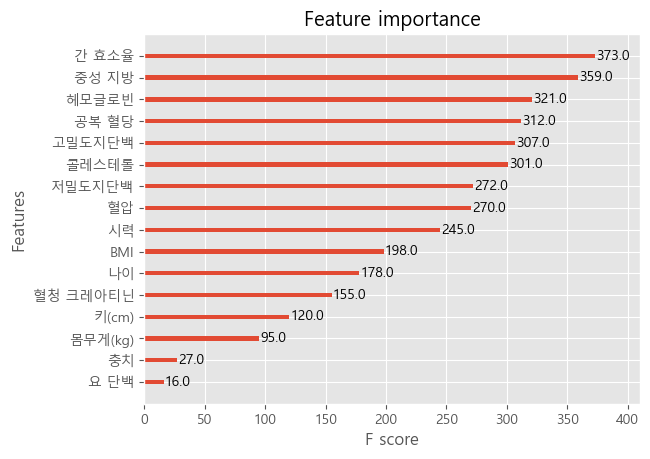

In [43]:
import xgboost
xgboost.plot_importance(xgb)

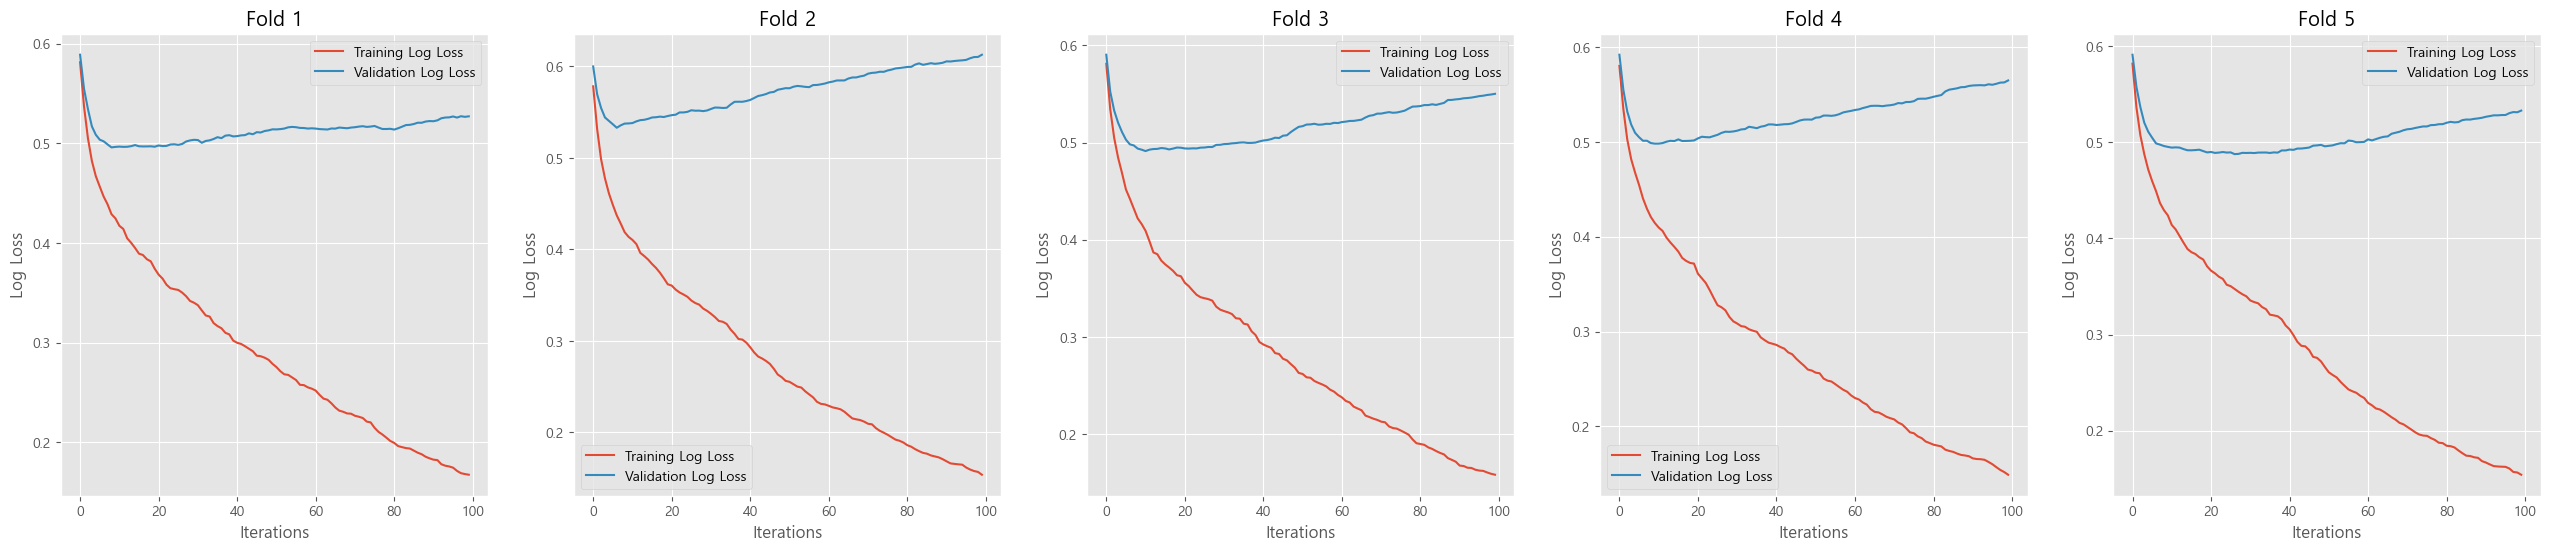

In [ ]:
# Plot the learning curves
fig, axes = plt.subplots(1, 5, figsize=(32, 6))
for i, evals_result in enumerate(evals_result_all):
    train_logloss = evals_result['validation_0']['logloss']
    valid_logloss = evals_result['validation_1']['logloss']
    axes[i].plot(train_logloss, label='Training Log Loss')
    axes[i].plot(valid_logloss, label='Validation Log Loss')
    axes[i].set_title(f'Fold {i+1}')
    axes[i].set_xlabel('Iterations')
    axes[i].set_ylabel('Log Loss')
    axes[i].legend()

## Submission

In [45]:
submit['label'] = xgb_test_preds

In [46]:
submit.to_csv('xgb_outlier.csv',index=False)